In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline



In [22]:
# Read in and grayscale the image
image = mpimg.imread('test.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)


(540, 960)


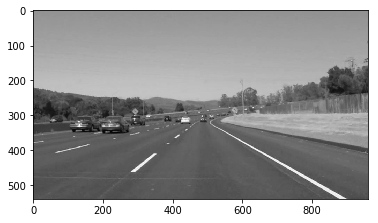

In [10]:
plt.imshow(gray,cmap='gray')

print(gray.shape)

In [13]:
# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)



(540, 960)


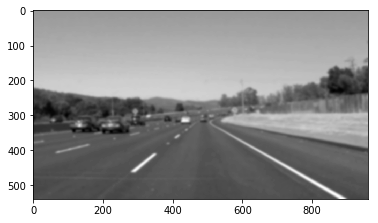

In [14]:
plt.imshow(blur_gray,cmap='gray')

print(gray.shape)

In [15]:
# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)



In [17]:
print(edges)

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


(540, 960)


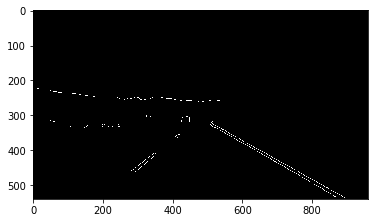

In [23]:
plt.imshow(edges,cmap='gray')
print(edges.shape)

In [24]:
# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)   
ignore_mask_color = 255   

# This time we are defining a four sided polygon to mask
imshape = image.shape
vertices = np.array([[(0,imshape[0]),(450, 300), (500,300), (imshape[1],imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

(540, 960)


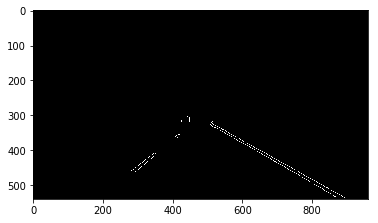

In [25]:
plt.imshow(masked_edges,cmap='gray')
print(masked_edges.shape)

In [27]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 5     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 10 #minimum number of pixels making up a line
max_line_gap = 1    # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

In [28]:
print(lines)

[[[564 353 896 537]]

 [[577 367 701 436]]

 [[296 448 344 410]]

 [[324 437 345 418]]

 [[552 346 593 368]]

 [[295 461 335 426]]

 [[697 435 767 474]]

 [[792 490 851 523]]

 [[516 332 565 359]]

 [[840 518 874 537]]

 [[281 460 297 448]]

 [[543 341 563 351]]

 [[773 479 806 497]]

 [[763 473 791 488]]

 [[428 320 445 320]]

 [[513 324 551 344]]

 [[514 331 528 339]]

 [[675 414 685 419]]

 [[646 398 656 403]]

 [[749 465 759 470]]

 [[669 419 693 432]]

 [[585 371 597 377]]

 [[724 441 739 449]]

 [[848 522 863 530]]]


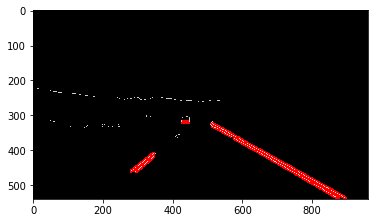

In [29]:
# Iterate over the output "lines" and draw lines on a blank image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 

# Draw the lines on the edge image
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0) 
plt.imshow(lines_edges)




In [30]:
print(line_image.shape)
print(color_edges.shape) 

(540, 960, 3)
(540, 960, 3)
